In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
! ls

 cnn_handWrittenDigit.csv			  sam.csv
'HandWrittenDigit Recognition with Keras.ipynb'   sample_submission.csv
'HandWrittenDigit with Tensorflow.ipynb'	  test.csv
 model						  train.csv


In [3]:
mnist = pd.read_csv('train.csv')

In [4]:
mnist.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
target = mnist['label'].T

In [7]:
target.shape

(42000,)

In [8]:
target = np.array([target]).T

In [9]:
target.shape

(42000, 1)

In [10]:
features = np.array(mnist.iloc[:,1:])

In [11]:
features.shape

(42000, 784)

In [12]:
mnist.shape

(42000, 785)

In [13]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [14]:
target = to_categorical(target)
target.shape

(42000, 10)

In [15]:
X_train,X_val,y_train,y_val = train_test_split(features,target,test_size=0.2,random_state=42)

In [16]:
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
# y_train = y_train.reshape(-1,28,28,1)
# y_val = y_val.reshape(-1,28,28,1)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(33600, 10)
(8400, 10)


In [17]:
X_train=X_train.astype('float32')
X_val =X_val.astype('float32')
X_train/=255
X_val/=255

In [18]:
import matplotlib.pyplot as plt

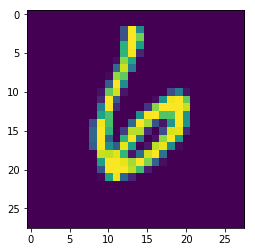

In [19]:
plt.imshow(X_train[0][:,:,0])
plt.show()

In [20]:
from keras.preprocessing import image

In [21]:
data = image.ImageDataGenerator(featurewise_center=False,featurewise_std_normalization=False, 
                                rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.1)

In [22]:
data.fit(X_train)

In [1]:
from keras import models,layers

Using TensorFlow backend.


In [24]:
model = models.Sequential()

model.add(layers.Conv2D(28,(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(layers.Conv2D(28,(5,5),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(pool_size=(2,2),padding='same'))

model.add(layers.Conv2D(56,(3,3),activation='relu',padding='same'))
model.add(layers.Conv2D(56,(5,5),activation='relu',padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2),padding='same'))

model.add(layers.Conv2D(102,(3,3),activation='relu',padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2),padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(2048,activation='elu'))
model.add(layers.Dense(1024,activation='elu'))
model.add(layers.Dense(10,activation='softmax'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 28)        280       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 28)        19628     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 56)        14168     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 56)        78456     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 56)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 102)         51510     
__________

In [26]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-3,rho=0.9),metrics=['acc'])

In [27]:
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [28]:
model.fit_generator(data.flow(X_train,y_train,batch_size=84),epochs=1,validation_data=(X_val,y_val),steps_per_epoch=len(X_train)//84,callbacks=[learning_rate_reduction])

Epoch 1/1
400/400 [==============================] - 96s - loss: 0.4881 - acc: 0.8400 - val_loss: 0.0574 - val_acc: 0.9825


In [29]:
! ls

 cnn_handWrittenDigit.csv			  sam.csv
'HandWrittenDigit Recognition with Keras.ipynb'   sample_submission.csv
'HandWrittenDigit with Tensorflow.ipynb'	  test.csv
 model						  train.csv


In [30]:
test = pd.read_csv('test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X_test = np.array(test)

In [32]:
X_test.shape

(28000, 784)

In [33]:
X_test = X_test.reshape(-1,28,28,1)

In [34]:
X_test.shape

(28000, 28, 28, 1)

In [35]:
y_test = model.predict(X_test)
y_test.shape

(28000, 10)

In [37]:
results = np.argmax(y_test,axis=1)

results = pd.Series(results,name="Label")

(28000,)


In [38]:
submission = pd.concat([pd.Series(range(1,28001),name="ImageId"),results],axis=1)
submission.to_csv("cnn_handWrittenDigit.csv",index=False)